Text

In [120]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from datetime import datetime
from datetime import timezone
import pandas_profiling
import pyodbc
import warnings
%matplotlib inline

# Get data from database

## Data electric power consumption

In [121]:
# Get data electric consumption for Gemeente=Hasselt AND Register=Afname

# Connect to database 'SmartMeterData'
connStr = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=P210180\SYNTRA_TNVN;DATABASE=SmartMeterData;Trusted_Connection=yes')
cursor = connStr.cursor()

# Query data electric consumption for Gemeente=Hasselt AND Register=Afname
query_elek_Hasselt_Afname = '''SELECT VanDatum,VanTijdstip,Register,Volume,Gemeente FROM Elektriciteit
            INNER JOIN EANcodes ON Elektriciteit.EAN = EANcodes.[EAN-code]
            WHERE Gemeente = 'Hasselt'
            AND Register = 'Afname' '''
df_elek_Afname = pd.read_sql(query_elek_Hasselt_Afname, connStr)

# Ignore warnings
warnings.filterwarnings('ignore')

# Set datetime as index
df_elek_Afname['Datetime'] = pd.to_datetime(df_elek_Afname['VanDatum'] + " " + df_elek_Afname['VanTijdstip'], dayfirst=True)
df_elek_Afname.set_index('Datetime',inplace=True,drop=True)

# Convert dtype of volume to float 
df_elek_Afname['Elek afname (kWh)'] = df_elek_Afname['Volume'].str.replace(',', '.').astype(float)

#Remove unnecessary colums
del df_elek_Afname['VanDatum']
del df_elek_Afname['VanTijdstip']
del df_elek_Afname['Register']
del df_elek_Afname['Volume']
del df_elek_Afname['Gemeente']

df_elek_Afname

,Elek afname (kWh)
Datetime,
2022-01-01 00:00:00,0.067
2022-01-01 00:15:00,0.054
2022-01-01 00:30:00,0.066
2022-01-01 00:45:00,0.055
2022-01-01 01:00:00,0.064
...,...
2022-06-30 22:45:00,0.068
2022-06-30 23:00:00,0.057
2022-06-30 23:15:00,0.044


## Data electric power injection

In [122]:
# Get data electric consumption for Gemeente=Hasselt AND Register=Injectie

# Query data electric consumption for Gemeente=Hasselt AND Register=Injectie
query_elek_Hasselt_Injectie = '''SELECT VanDatum,VanTijdstip,Register,Volume,Gemeente FROM Elektriciteit
            INNER JOIN EANcodes ON Elektriciteit.EAN = EANcodes.[EAN-code]
            WHERE Gemeente = 'Hasselt'
            AND Register = 'Injectie' '''
df_elek_Injectie = pd.read_sql(query_elek_Hasselt_Injectie, connStr)

# Ignore warnings
warnings.filterwarnings('ignore')

# Set datetime as index
df_elek_Injectie['Datetime'] = pd.to_datetime(df_elek_Injectie['VanDatum'] + " " + df_elek_Injectie['VanTijdstip'], dayfirst=True)
df_elek_Injectie.set_index('Datetime',inplace=True,drop=True)

# Convert dtype of volume to float 
df_elek_Injectie['Elek injectie (kWh)'] = df_elek_Injectie['Volume'].str.replace(',', '.').astype(float)

#Remove unnecessary colums
del df_elek_Injectie['VanDatum']
del df_elek_Injectie['VanTijdstip']
del df_elek_Injectie['Register']
del df_elek_Injectie['Volume']
del df_elek_Injectie['Gemeente']

df_elek_Injectie

,Elek injectie (kWh)
Datetime,
2022-01-01 00:00:00,0.0
2022-01-01 00:15:00,0.0
2022-01-01 00:30:00,0.0
2022-01-01 00:45:00,0.0
2022-01-01 01:00:00,0.0
...,...
2022-06-30 22:45:00,0.0
2022-06-30 23:00:00,0.0
2022-06-30 23:15:00,0.0


## Data gas consumption

In [123]:
# Get data gas consumption for Gemeente=Hasselt

# Query data aardgas for Gemeente=Hasselt
query_aardgas_Hasselt = '''SELECT VanDatum,VanTijdstip,Volume,Gemeente FROM Aardgas
            INNER JOIN EANcodes ON Aardgas.EAN = EANcodes.[EAN-code]
            WHERE Gemeente = 'Hasselt' '''
df_aardgas = pd.read_sql(query_aardgas_Hasselt, connStr)

# Ignore warnings
warnings.filterwarnings('ignore')

# Set datetime as index
df_aardgas['Datetime'] = pd.to_datetime(df_aardgas['VanDatum'] + " " + df_aardgas['VanTijdstip'], dayfirst=True)
df_aardgas.set_index('Datetime',inplace=True,drop=True)

# Convert dtype of volume to float 
df_aardgas['Aardgas afname (kWh)'] = df_aardgas['Volume'].str.replace(',', '.').astype(float)

#Remove unnecessary colums
del df_aardgas['VanDatum']
del df_aardgas['VanTijdstip']
del df_aardgas['Volume']
del df_aardgas['Gemeente']

df_aardgas

,Aardgas afname (kWh)
Datetime,
2022-01-01 00:00:00,0.466
2022-01-01 01:00:00,2.022
2022-01-01 02:00:00,0.034
2022-01-01 03:00:00,2.101
2022-01-01 04:00:00,1.931
...,...
2022-06-30 19:00:00,0.000
2022-06-30 20:00:00,0.000
2022-06-30 21:00:00,0.000


## Data outdoor temperature (ODT)

In [124]:
# Get data gas consumption for Gemeente=Hasselt

# Query data aardgas for Gemeente=Hasselt
query_ODT = '''SELECT * FROM Temperatuur '''
df_ODT = pd.read_sql(query_ODT, connStr)

# # Ignore warnings
# warnings.filterwarnings('ignore')

# Set datetime as index
df_ODT['Datetime'] = pd.to_datetime(df_ODT['Datetime'], dayfirst=True)
df_ODT.set_index('Datetime',inplace=True,drop=True)

# Convert dtype of temperature to float 
df_ODT['Temperatuur (°C)'] = df_ODT['Temperatuur (°C)'].str.replace(',', '.').astype(float)

# Resample to 1 hour data en drop NA's
df_ODT = df_ODT.resample(rule='H').mean().dropna()

df_ODT

,Temperatuur (°C)
Datetime,
2022-01-01 01:00:00,12.9
2022-01-01 02:00:00,12.9
2022-01-01 03:00:00,12.7
2022-01-01 04:00:00,12.7
2022-01-01 05:00:00,12.6
...,...
2022-06-30 19:00:00,13.8
2022-06-30 20:00:00,13.7
2022-06-30 21:00:00,13.5


# Prepare energy data for data analysis

## Data electric power

In [125]:
# Merge 'df_elek_Afname' and 'df_elek_Injectie' into 1 dataframe
df_elek = pd.merge(df_elek_Afname,df_elek_Injectie,on='Datetime')
df_elek

,Elek afname (kWh),Elek injectie (kWh)
Datetime,,
2022-01-01 00:00:00,0.067,0.0
2022-01-01 00:15:00,0.054,0.0
2022-01-01 00:30:00,0.066,0.0
2022-01-01 00:45:00,0.055,0.0
2022-01-01 01:00:00,0.064,0.0
...,...,...
2022-06-30 22:45:00,0.068,0.0
2022-06-30 23:00:00,0.057,0.0
2022-06-30 23:15:00,0.044,0.0


In [126]:
# Resample on 15min (original)
df_elek_15min = df_elek

# Resample on 1hour
df_elek_hourly = df_elek.resample(rule='H').sum()

# Resample on daily
df_elek_daily = df_elek.resample(rule='D').sum()

## Data aardgas

In [155]:
# Merge 'df_aardgas' and 'df_ODT' into 1 dataframe
# Merge left because df_ODT does not have values for all hours
df_aardgas_ODT = pd.merge(df_aardgas,df_ODT,on='Datetime',how='left')

# Missing values for ODT are interpolated
# First row is set equal to second row because interpolation is not possible
df_aardgas_ODT = df_aardgas_ODT.interpolate()
df_aardgas_ODT.iloc[0,1] = df_aardgas_ODT.iloc[1,1]
df_aardgas_ODT

,Aardgas afname (kWh),Temperatuur (°C)
Datetime,,
2022-01-01 00:00:00,0.466,12.9
2022-01-01 01:00:00,2.022,12.9
2022-01-01 02:00:00,0.034,12.9
2022-01-01 03:00:00,2.101,12.7
2022-01-01 04:00:00,1.931,12.7
...,...,...
2022-06-30 19:00:00,0.000,13.8
2022-06-30 20:00:00,0.000,13.7
2022-06-30 21:00:00,0.000,13.5


In [156]:
# Resample on 1hour (original)
df_aardgas_ODT_hourly = df_aardgas_ODT

# Resample on daily
# Take the sum for 'Aardgas afname' and the average for 'Temperatuur'
df_aardgas_ODT_daily = df_aardgas_ODT.resample(rule='D').sum()
df_aardgas_ODT_daily['Temperatuur (°C)'] = round(df_aardgas_ODT_daily['Temperatuur (°C)']/24,1)
df_aardgas_ODT_daily

,Aardgas afname (kWh),Temperatuur (°C)
Datetime,,
2022-01-01,36.948,12.5
2022-01-02,37.678,12.0
2022-01-03,41.583,9.7
2022-01-04,54.591,6.8
2022-01-05,63.668,3.5
...,...,...
2022-06-26,7.641,17.4
2022-06-27,5.938,16.8
2022-06-28,6.654,18.3


# Data analysis questions for electric power

## Show the consumption and injection time profile, on a daily basis

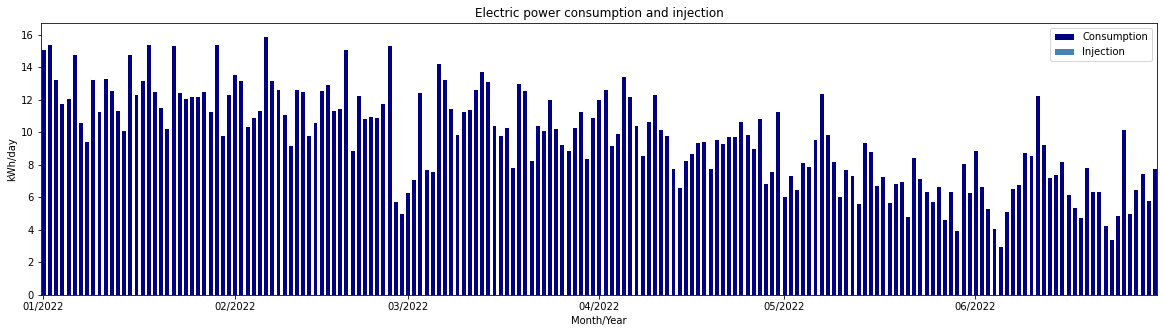

In [157]:
# Define plot space
fig, ax = plt.subplots(figsize = (20,5))

# Create bar plot for electric power consumption
ax.bar(df_elek_daily.index,
       df_elek_daily['Elek afname (kWh)'],
      color = 'navy',
      edgecolor = 'white',
      label = 'Consumption')

# Create bar plot for electric power injection
ax.bar(df_elek_daily.index,
       -df_elek_daily['Elek injectie (kWh)'],
      color = 'steelblue',
      edgecolor = 'white',
      label = 'Injection')

# Add title, labels and legend
ax.set(title = "Electric power consumption and injection",
       xlabel = "Month/Year", 
       ylabel = "kWh/day")
ax.legend();

# Customize axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
ax.autoscale(axis='x',tight=True);

plt.show()

## Calculate the total consumption and injection

In [158]:
df_elek_15min.sum()

Elek afname (kWh)      1758.988
Elek injectie (kWh)       0.000
dtype: float64

## Show profile for a specific day

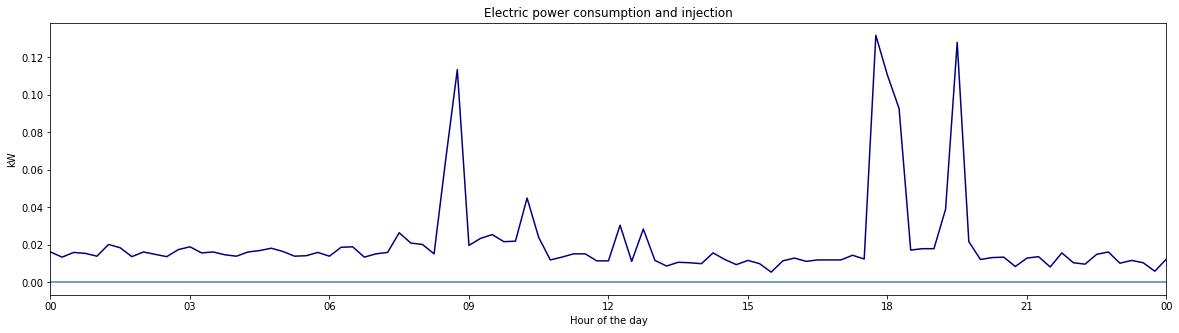

In [199]:
df_elek_15min_selected = df_elek_15min[(df_elek_15min.index<='2022-05-10 00:00:00') & (df_elek_15min.index >= '2022-05-09 00:00:00')]

# Define plot space
fig, ax = plt.subplots(figsize = (20,5))

# Create line plot for electric power consumption
ax.plot(df_elek_15min_selected['Elek afname (kWh)']/4,
        color = 'navy')

ax.plot(-df_elek_15min_selected['Elek injectie (kWh)']/4,
        color = 'steelblue')

# Add title, labels and legend
ax.set(title = "Electric power consumption and injection",
       xlabel = "Hour of the day", 
       ylabel = "kW")

# Customize axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.autoscale(axis='x',tight=True);

plt.show()

## Show the load duration curve, on 15min basis

In [134]:
df_elek_15min_loadcurve = df_elek_15min['Elek afname (kWh)'].sort_values(ascending=False)
df_elek_15min_loadcurve = df_elek_15min_loadcurve.reset_index()
df_elek_15min_loadcurve

,Datetime,Elek afname (kWh)
0,2022-05-07 17:45:00,1.127
1,2022-04-21 18:00:00,1.123
2,2022-01-17 08:15:00,1.107
3,2022-04-02 12:45:00,1.083
4,2022-05-06 18:15:00,1.072
...,...,...
17367,2022-06-23 19:45:00,0.011
17368,2022-06-18 16:45:00,0.011
17369,2022-06-23 11:45:00,0.010
17370,2022-06-23 17:45:00,0.010


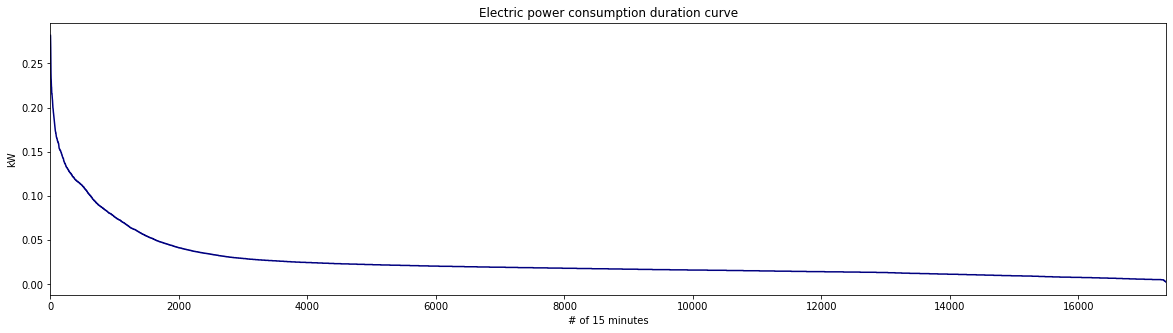

In [136]:
# Define plot space
fig, ax = plt.subplots(figsize = (20,5))

# Create bar plot for electric power consumption
ax.plot(df_elek_15min_loadcurve.index,
        df_elek_15min_loadcurve['Elek afname (kWh)']/4,
        color = 'navy')

# Add title, labels and legend
ax.set(title = "Electric power consumption duration curve",
       xlabel = "# of 15 minutes", 
       ylabel = "kW")

ax.autoscale(axis='x',tight=True);

plt.show()

# Data analysis questions for natural gas

## Show the time profile for natural gas consumption and the outdoor temperature, on a daily basis

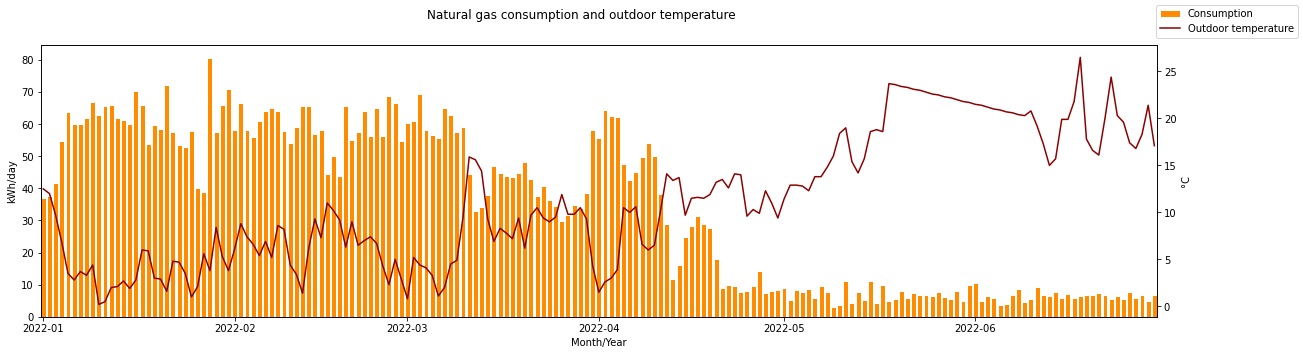

In [196]:
# Define plot space
fig, ax1 = plt.subplots(figsize = (20,5))

# Create bar plot for natural gas consumption (primary axis)
ax1.bar(df_aardgas_ODT_daily.index,
       df_aardgas_ODT_daily['Aardgas afname (kWh)'],
      color = 'darkorange',
      edgecolor = 'white',
      label = 'Consumption')

# Create line plot for temperature (secondary axis)
ax2 = ax1.twinx()
ax2.plot(df_aardgas_ODT_daily['Temperatuur (°C)'],
        color = 'darkred',
        label = 'Outdoor temperature')

# Add title, labels and legend
fig.suptitle("Natural gas consumption and outdoor temperature")
ax1.set(xlabel = "Month/Year",
        ylabel = "kWh/day")
ax2.set(xlabel = "Month/Year",
        ylabel = "°C")
fig.legend()

# Customize axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
ax2.autoscale(axis='x',tight=True);

plt.show()

## Calculate the total consumption

In [198]:
df_aardgas_ODT['Aardgas afname (kWh)'].sum()

6212.971

## Show profile for a specific day

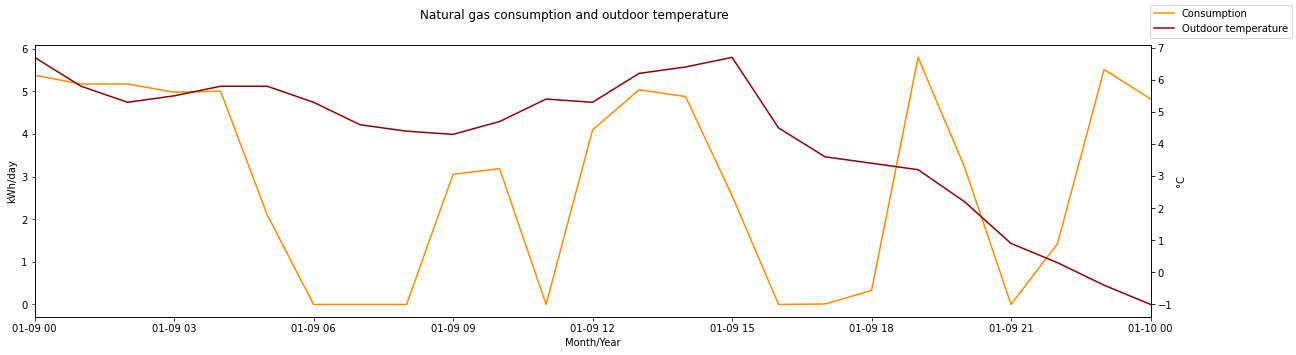

In [226]:
# Select day as condition
df_aardgas_ODT_hourly_selected = df_aardgas_ODT_hourly[(df_aardgas_ODT_hourly.index<='2022-01-10 00:00:00') & (df_aardgas_ODT_hourly.index >= '2022-01-09 00:00:00')]

# Define plot space
fig, ax1 = plt.subplots(figsize = (20,5))

# Create bar plot for natural gas consumption (primary axis)
ax1.plot(df_aardgas_ODT_hourly_selected['Aardgas afname (kWh)'],
         color = 'darkorange',
         label = 'Consumption')

# Create line plot for temperature (secondary axis)
ax2 = ax1.twinx()
ax2.plot(df_aardgas_ODT_hourly_selected['Temperatuur (°C)'],
        color = 'darkred',
        label = 'Outdoor temperature')

# Add title, labels and legend
fig.suptitle("Natural gas consumption and outdoor temperature")
ax1.set(xlabel = "Month/Year",
        ylabel = "kWh/day")
ax2.set(xlabel = "Month/Year",
        ylabel = "°C")
fig.legend()

# Customize axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
ax2.autoscale(axis='x',tight=True);

plt.show()

## Show the correlation between natural gas consumption and outdoor temperature

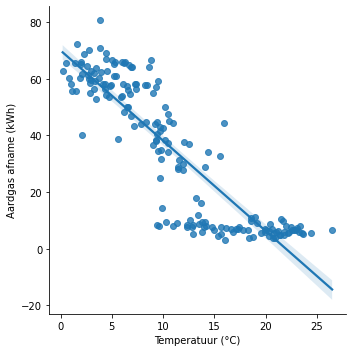

In [224]:
fig = sns.lmplot("Temperatuur (°C)","Aardgas afname (kWh)",df_aardgas_ODT_daily)